成功读取文件: C:/Users/41227/Desktop/CMCSP-0CC.csv
数据点数量: 7729
波数范围: 349.05 - 7800.65 cm-1
波数已按降序排列。
--- 1. 数据预处理：平滑 ---
--- 2. 峰检测 ---
检测到 322 个峰。


C:\Users\41227\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24378 (\N{CJK UNIFIED IDEOGRAPH-5F3A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\41227\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\41227\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20809 (\N{CJK UNIFIED IDEOGRAPH-5149}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\41227\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35889 (\N{CJK UNIFIED IDEOGRAPH-8C31}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\41227\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 332

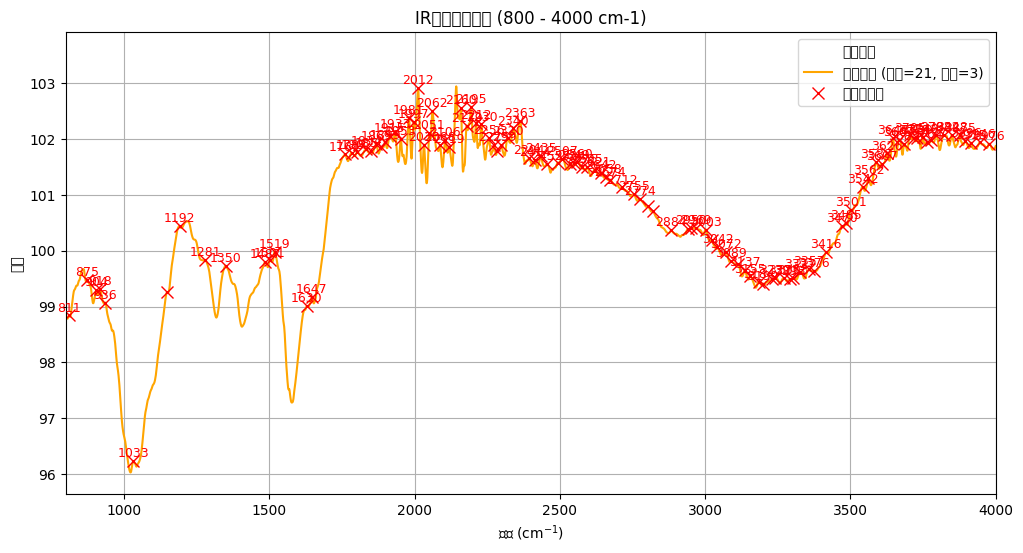


--- 3. 寻峰结果 ---
检测到的峰位置 (波数), 强度, 突出度, 宽度:
  峰 1:
    波数: 7781.36 cm-1
    强度: 99.5550
    突出度: 0.6810
    宽度 (波数): 6.07 cm-1
--------------------
  峰 2:
    波数: 7757.26 cm-1
    强度: 102.9747
    突出度: 3.4105
    宽度 (波数): 15.76 cm-1
--------------------
  峰 3:
    波数: 7739.90 cm-1
    强度: 99.8110
    突出度: 0.1426
    宽度 (波数): 2.45 cm-1
--------------------
  峰 4:
    波数: 7727.37 cm-1
    强度: 104.8494
    突出度: 0.6267
    宽度 (波数): 3.48 cm-1
--------------------
  峰 5:
    波数: 7713.87 cm-1
    强度: 106.9034
    突出度: 9.8905
    宽度 (波数): 25.14 cm-1
--------------------
  峰 6:
    波数: 7690.73 cm-1
    强度: 103.2192
    突出度: 2.1877
    宽度 (波数): 12.41 cm-1
--------------------
  峰 7:
    波数: 7673.37 cm-1
    强度: 101.0684
    突出度: 0.0344
    宽度 (波数): 2.21 cm-1
--------------------
  峰 8:
    波数: 7661.80 cm-1
    强度: 103.5274
    突出度: 3.6797
    宽度 (波数): 10.07 cm-1
--------------------
  峰 9:
    波数: 7635.76 cm-1
    强度: 101.7907
    突出度: 1.1465
    宽度 (波数): 16.54 cm-1
--------------------
  峰 10:


KeyError: 'peak_heights'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, savgol_filter
import pandas as pd # 导入pandas库用于读取CSV

def ir_peak_finder(wavenumbers, intensities,
                   prominence_threshold=0.1,  # 峰的突出度阈值，用于检测峰
                   width_threshold=(1, 50),   # 峰的宽度范围
                   distance_threshold=5,      # 峰之间的最小距离
                   smooth_window_length=11,   # Savitzky-Golay平滑窗口长度
                   smooth_polyorder=3,        # Savitzky-Golay平滑多项式阶数
                   plot_results=True,
                   plot_range=(800, 3000),    # 绘图范围参数
                   label_prominence_threshold=None): # 新增：标注峰的突出度阈值
    """
    自动寻峰IR光谱数据。

    参数:
        wavenumbers (np.array): 波长或波数数据。
        intensities (np.array): 光谱强度数据。
        prominence_threshold (float): 峰的突出度阈值，用于过滤不明显的峰。
                                      突出度是峰相对于其两侧最低点的相对高度。
        width_threshold (tuple): 峰的宽度范围 (min_width, max_width)。
        distance_threshold (int): 两个峰之间的最小水平距离（数据点数）。
        smooth_window_length (int): Savitzky-Golay滤波器窗口长度，必须是奇数。
        smooth_polyorder (int): Savitzky-Golay滤波器多项式阶数。
        plot_results (bool): 是否绘制寻峰结果。
        plot_range (tuple): 绘图的波数范围 (min_wavenumber, max_wavenumber)。
        label_prominence_threshold (float, optional): 仅当峰的突出度高于此阈值时才在图上标注波数。
                                                       如果为None，则标注所有检测到的峰。

    返回:
        tuple: (peak_indices, peak_properties)，其中 peak_indices 是峰的索引，
               peak_properties 是 find_peaks 返回的字典（包含'prominences', 'widths'等）。
    """

    print("--- 1. 数据预处理：平滑 ---")
    smoothed_intensities = savgol_filter(intensities, window_length=smooth_window_length, polyorder=smooth_polyorder)

    print("--- 2. 峰检测 ---")
    peak_indices, properties = find_peaks(smoothed_intensities,
                                            prominence=prominence_threshold,
                                            width=width_threshold,
                                            distance=distance_threshold)

    print(f"检测到 {len(peak_indices)} 个峰。")

    if plot_results:
        plt.figure(figsize=(12, 6))

        # 筛选绘图范围内的索引
        mask = (wavenumbers >= plot_range[0]) & (wavenumbers <= plot_range[1])
        plot_wavenumbers = wavenumbers[mask]
        plot_intensities = intensities[mask]
        plot_smoothed_intensities = smoothed_intensities[mask]

        # 筛选绘图范围内且在检测到的峰中的索引
        plot_peak_indices_in_range = []
        for idx in peak_indices:
            if plot_range[0] <= wavenumbers[idx] <= plot_range[1]:
                # 找到该峰在裁剪后的wavenumbers数组中的新索引
                # np.where返回的是一个元组，需要取第一个元素[0]
                new_idx_array = np.where(plot_wavenumbers == wavenumbers[idx])[0]
                if new_idx_array.size > 0: # 确保找到了对应的点
                    plot_peak_indices_in_range.append(new_idx_array[0])

        plt.plot(plot_wavenumbers, plot_intensities, label='原始光谱', alpha=0.0) # 将原始光谱透明度降低，突出平滑光谱
        plt.plot(plot_wavenumbers, plot_smoothed_intensities, label=f'平滑光谱 (窗口={smooth_window_length}, 阶数={smooth_polyorder})', color='orange')
        plt.plot(plot_wavenumbers[plot_peak_indices_in_range], plot_smoothed_intensities[plot_peak_indices_in_range], "x", color='red', markersize=8, label='检测到的峰')

        # 在峰上标注波数值，仅标注突出度高于 label_prominence_threshold 的峰
        for i, original_idx in enumerate(peak_indices):
            peak_prominence = properties['prominences'][i]
            if (label_prominence_threshold is None or peak_prominence >= label_prominence_threshold) and \
               (plot_range[0] <= wavenumbers[original_idx] <= plot_range[1]):
                # 确保只在绘图范围内且满足标注突出度阈值的峰进行标注
                plt.text(wavenumbers[original_idx],
                         smoothed_intensities[original_idx] + 0.02, # 稍微抬高文本位置
                         f'{wavenumbers[original_idx]:.0f}', # 只显示整数波数
                         ha='center', va='bottom', fontsize=9, color='red')


        plt.title(f'IR光谱自动寻峰 ({plot_range[0]} - {plot_range[1]} cm-1)')
        plt.xlabel('波数 (cm$^{-1}$)')
        plt.ylabel('强度')
        plt.legend()
        plt.grid(True)
        plt.xlim(plot_range[0], plot_range[1]) # 强制设置X轴范围
        plt.show()

    print("\n--- 3. 寻峰结果 ---")
    if len(peak_indices) > 0:
        print("检测到的峰位置 (波数), 强度, 突出度, 宽度:")
        for i, idx in enumerate(peak_indices):
            print(f"  峰 {i+1}:")
            print(f"    波数: {wavenumbers[idx]:.2f} cm-1")
            print(f"    强度: {smoothed_intensities[idx]:.4f}")
            print(f"    突出度: {properties['prominences'][i]:.4f}")
            if len(wavenumbers) > 1:
                wavenumber_step = np.abs(wavenumbers[1] - wavenumbers[0])
                print(f"    宽度 (波数): {properties['widths'][i] * wavenumber_step:.2f} cm-1")
            print("-" * 20)
    else:
        print("未检测到峰。请尝试调整寻峰参数。")

    return peak_indices, properties

# --- 示例用法 ---
if __name__ == "__main__":
    # 1. 读取CSV格式的IR光谱数据
    csv_file_path = 'C:/Users/41227/Desktop/CMCSP-0CC.csv' # 替换为你的CSV文件路径

    try:
        # 尝试读取CSV文件，假设第一列是波数，第二列是强度
        df = pd.read_csv(csv_file_path, header=None)
        wavenumbers_raw = df.iloc[:, 0].values # 第一列作为波数
        intensities_raw = df.iloc[:, 1].values # 第二列作为强度
        print(f"成功读取文件: {csv_file_path}")
        print(f"数据点数量: {len(wavenumbers_raw)}")
        print(f"波数范围: {wavenumbers_raw.min():.2f} - {wavenumbers_raw.max():.2f} cm-1")

        # 确保波数是降序排列，如果不是，需要调整
        if wavenumbers_raw[0] < wavenumbers_raw[-1]:
            wavenumbers = np.flip(wavenumbers_raw)
            intensities = np.flip(intensities_raw)
            print("波数已按降序排列。")
        else:
            wavenumbers = wavenumbers_raw
            intensities = intensities_raw
            print("波数已是降序排列。")

    except FileNotFoundError:
        print(f"错误：文件 '{csv_file_path}' 未找到。请检查文件路径是否正确。")
        exit()
    except Exception as e:
        print(f"读取CSV文件时发生错误: {e}")
        print("请检查CSV文件格式，确保第一列是波数，第二列是强度。")
        exit()


    # 2. 调用自动寻峰函数
    # 调整这些参数以适应你的实际光谱数据
    peak_indices, peak_properties = ir_peak_finder(
        wavenumbers,
        intensities,
        prominence_threshold=0.005,    # 峰检测的突出度阈值，用于识别所有感兴趣的峰
        width_threshold=(2, 100),    # 峰的宽度范围
        distance_threshold=10,       # 避免检测到非常接近的峰
        smooth_window_length=21,     # 平滑窗口
        smooth_polyorder=3,          # 平滑多项式阶数
        plot_range=(800, 4000),      # 仅绘制800-3000 cm-1范围
        label_prominence_threshold=0.01 # 仅标注突出度大于等于 0.01 的峰
    )

    # 3. 打印额外的峰属性（可选）
    print("\n--- 更多峰属性 ---")
    if peak_indices.size > 0:
        for i, idx in enumerate(peak_indices):
            print(f"峰 {i+1} (波数: {wavenumbers[idx]:.2f} cm-1):")
            print(f"  左基线索引: {peak_properties['left_bases'][i]}")
            print(f"  右基线索引: {peak_properties['right_bases'][i]}")
            print(f"  半高宽 (数据点数): {peak_properties['widths'][i]:.2f}")
            if len(wavenumbers) > 1:
                wavenumber_step = np.abs(wavenumbers[1] - wavenumbers[0])
                print(f"  半高宽 (波数): {peak_properties['widths'][i] * wavenumber_step:.2f} cm-1")
            print(f"  峰高度: {peak_properties['peak_heights'][i]:.4f}")
            print("-" * 20)
    else:
        print("没有检测到峰。")

Successfully read file: ./CMCSP-045CC.csv
Number of data points: 3736
Wavenumber range: 399.19 - 4000.60 cm-1
Wavenumbers have been reordered to descending.

--- Data Verification ---
Wavenumber array shape: (3736,), dtype: float64
Intensity array shape: (3736,), dtype: float64
First 5 wavenumbers: [4000.6045 3999.6404 3998.676  3997.7119 3996.7476]
First 5 intensities: [100.62  100.63  100.637 100.643 100.651]
--- End Data Verification ---

--- 1. Data Preprocessing: Smoothing ---
--- 2. Valley Detection (via data inversion) ---
Detected 46 valleys (absorption peaks).


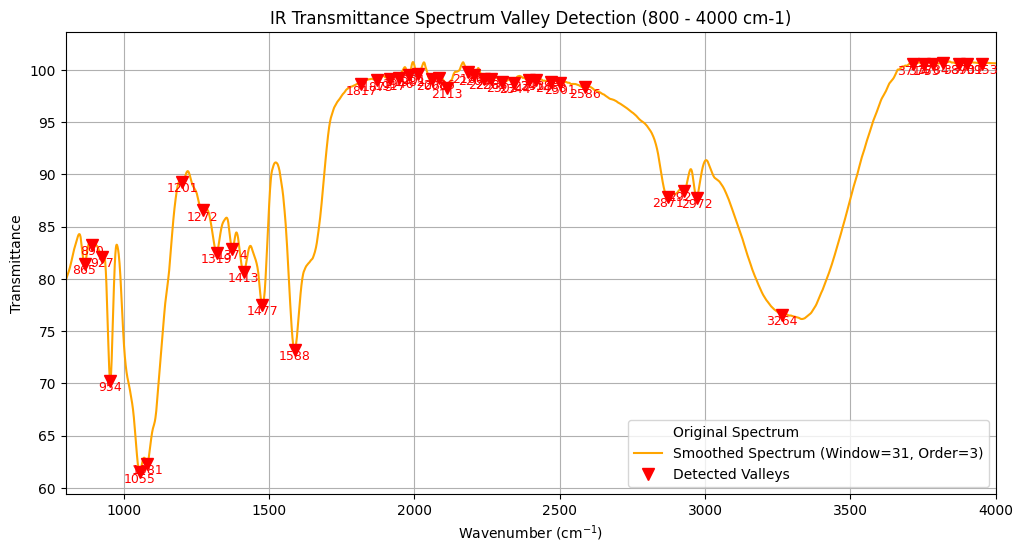


--- 3. Valley Detection Results ---
Detected Valley Position (Wavenumber), Intensity (Transmittance), Depth (Prominence), Width:
  Valley 1:
    Wavenumber: 3953.36 cm-1
    Transmittance: 100.6153
    Depth (Prominence): 0.0707
    Width (Wavenumber): 20.60 cm-1
--------------------
  Valley 2:
    Wavenumber: 3901.29 cm-1
    Transmittance: 100.5806
    Depth (Prominence): 0.1569
    Width (Wavenumber): 19.98 cm-1
--------------------
  Valley 3:
    Wavenumber: 3873.33 cm-1
    Transmittance: 100.6063
    Depth (Prominence): 0.1085
    Width (Wavenumber): 20.27 cm-1
--------------------
  Valley 4:
    Wavenumber: 3820.29 cm-1
    Transmittance: 100.6460
    Depth (Prominence): 0.0145
    Width (Wavenumber): 4.94 cm-1
--------------------
  Valley 5:
    Wavenumber: 3783.65 cm-1
    Transmittance: 100.5998
    Depth (Prominence): 0.1681
    Width (Wavenumber): 51.42 cm-1
--------------------
  Valley 6:
    Wavenumber: 3752.80 cm-1
    Transmittance: 100.5307
    Depth (Prominence)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, savgol_filter
import pandas as pd # Import pandas library for reading CSV

def ir_valley_finder(wavenumbers, intensities,
                   prominence_threshold=0.1,  # Prominence (depth) threshold for valleys
                   width_threshold=(2, 100),   # Width range for valleys
                   distance_threshold=10,      # Minimum distance between valleys
                   smooth_window_length=40,   # Savitzky-Golay smoothing window length
                   smooth_polyorder=3,        # Savitzky-Golay smoothing polynomial order
                   plot_results=True,
                   plot_range=(800, 4000),    # Plotting range parameter
                   label_prominence_threshold=0.02): # New: Prominence threshold for labeling valleys
    """
    Automatically finds valleys (absorption peaks) in IR transmittance spectrum data.

    Parameters:
        wavenumbers (np.array): Wavenumber data.
        intensities (np.array): Transmittance intensity data.
        prominence_threshold (float): Prominence (depth) threshold for valleys, used to filter out
                                      insignificant valleys. Prominence is the relative depth of the
                                      valley with respect to its highest points on either side.
        width_threshold (tuple): Range (min_width, max_width) for valley width.
        distance_threshold (int): Minimum horizontal distance (in data points) between two valleys.
        smooth_window_length (int): Window length for the Savitzky-Golay filter, must be an odd number.
        smooth_polyorder (int): Polynomial order for the Savitzky-Golay filter.
        plot_results (bool): Whether to plot the valley finding results.
        plot_range (tuple): Wavenumber range for plotting (min_wavenumber, max_wavenumber).
        label_prominence_threshold (float, optional): Only valleys with prominence (depth) above this
                                                       threshold will be labeled on the plot. If None,
                                                       all detected valleys will be labeled.

    Returns:
        tuple: (valley_indices, valley_properties), where valley_indices are the indices of the valleys,
               and valley_properties is a dictionary returned by find_peaks (containing 'prominences', 'widths', etc.).
    """

    print("--- 1. Data Preprocessing: Smoothing ---")
    # Ensure window length is less than the number of data points
    if smooth_window_length >= len(intensities):
        print(f"Warning: Smoothing window length ({smooth_window_length}) is greater than or equal to the number of data points ({len(intensities)}). Adjusting window length.")
        if len(intensities) % 2 == 0:
            smooth_window_length = len(intensities) - 1
        else:
            smooth_window_length = len(intensities) - 2
        if smooth_window_length < 1: # Ensure at least 1
            smooth_window_length = 1
        print(f"New smoothing window length: {smooth_window_length}")

    # Ensure polynomial order is less than window length
    if smooth_polyorder >= smooth_window_length:
        print(f"Warning: Smoothing polynomial order ({smooth_polyorder}) is greater than or equal to the window length ({smooth_window_length}). Adjusting order.")
        smooth_polyorder = smooth_window_length - 1
        if smooth_polyorder < 0: # Ensure at least 0
            smooth_polyorder = 0
        print(f"New smoothing polynomial order: {smooth_polyorder}")

    smoothed_intensities = savgol_filter(intensities, window_length=smooth_window_length, polyorder=smooth_polyorder)

    print("--- 2. Valley Detection (via data inversion) ---")
    # Invert the smoothed data: valleys become peaks
    inverted_smoothed_intensities = -smoothed_intensities

    valley_indices, properties = find_peaks(inverted_smoothed_intensities,
                                            prominence=prominence_threshold, # Prominence here corresponds to the depth of the original valley
                                            width=width_threshold,
                                            distance=distance_threshold)

    print(f"Detected {len(valley_indices)} valleys (absorption peaks).")

    if plot_results:
        plt.figure(figsize=(12, 6))

        # Filter indices within the plotting range
        mask = (wavenumbers >= plot_range[0]) & (wavenumbers <= plot_range[1])
        plot_wavenumbers = wavenumbers[mask]
        plot_intensities = intensities[mask]
        plot_smoothed_intensities = smoothed_intensities[mask]

        # Filter detected valley indices that are also within the plotting range
        plot_valley_indices_in_range = []
        for idx in valley_indices:
            if plot_range[0] <= wavenumbers[idx] <= plot_range[1]:
                # Find the new index of this valley in the masked wavenumbers array
                # np.where returns a tuple, take the first element [0]
                new_idx_array = np.where(plot_wavenumbers == wavenumbers[idx])[0]
                if new_idx_array.size > 0: # Ensure a corresponding point is found
                    plot_valley_indices_in_range.append(new_idx_array[0])

        plt.plot(plot_wavenumbers, plot_intensities, label='Original Spectrum', alpha=0.0) # Reduce opacity of original spectrum to highlight smoothed
        plt.plot(plot_wavenumbers, plot_smoothed_intensities, label=f'Smoothed Spectrum (Window={smooth_window_length}, Order={smooth_polyorder})', color='orange')
        plt.plot(plot_wavenumbers[plot_valley_indices_in_range], plot_smoothed_intensities[plot_valley_indices_in_range], "v", color='red', markersize=8, label='Detected Valleys') # Use 'v' marker for valleys

        # Label wavenumbers on valleys, only for valleys with prominence (depth) above label_prominence_threshold
        for i, original_idx in enumerate(valley_indices):
            # Here, peak_prominence is actually the depth of the original valley
            valley_depth_prominence = properties['prominences'][i]
            if (label_prominence_threshold is None or valley_depth_prominence >= label_prominence_threshold) and \
               (plot_range[0] <= wavenumbers[original_idx] <= plot_range[1]):
                # Ensure labeling only for valleys within plot range and meeting the depth threshold
                plt.text(wavenumbers[original_idx],
                         smoothed_intensities[original_idx] - 0.02, # Slightly lower text position, as it's a valley
                         f'{wavenumbers[original_idx]:.0f}', # Display integer wavenumber only
                         ha='center', va='top', fontsize=9, color='red') # va='top' places text above the marker

        plt.title(f'IR Transmittance Spectrum Valley Detection ({plot_range[0]} - {plot_range[1]} cm-1)')
        plt.xlabel('Wavenumber (cm$^{-1}$)')
        plt.ylabel('Transmittance')
        plt.legend()
        plt.grid(True)
        plt.xlim(plot_range[0], plot_range[1]) # Force X-axis range
        plt.show()

    print("\n--- 3. Valley Detection Results ---")
    if len(valley_indices) > 0:
        print("Detected Valley Position (Wavenumber), Intensity (Transmittance), Depth (Prominence), Width:")
        for i, idx in enumerate(valley_indices):
            print(f"  Valley {i+1}:")
            print(f"    Wavenumber: {wavenumbers[idx]:.2f} cm-1")
            print(f"    Transmittance: {smoothed_intensities[idx]:.4f}") # Report original transmittance value
            print(f"    Depth (Prominence): {properties['prominences'][i]:.4f}") # Report prominence of inverted peak, which is valley depth
            if len(wavenumbers) > 1:
                wavenumber_step = np.abs(wavenumbers[1] - wavenumbers[0])
                print(f"    Width (Wavenumber): {properties['widths'][i] * wavenumber_step:.2f} cm-1")
            print("-" * 20)
    else:
        print("No valleys detected. Try adjusting the valley finding parameters.")

    return valley_indices, properties

# --- Example Usage ---
if __name__ == "__main__":
    csv_file_path = './CMCSP-045CC.csv' # Replace with your CSV file path

    try:
        # Attempt to read the CSV file, assuming the first column is wavenumber and the second is intensity
        df = pd.read_csv(csv_file_path, header=None)
        wavenumbers_raw = df.iloc[:, 0].values # First column as wavenumber
        intensities_raw = df.iloc[:, 1].values # Second column as intensity
        print(f"Successfully read file: {csv_file_path}")
        print(f"Number of data points: {len(wavenumbers_raw)}")
        print(f"Wavenumber range: {wavenumbers_raw.min():.2f} - {wavenumbers_raw.max():.2f} cm-1")

        # Ensure wavenumbers are in descending order; if not, flip them
        # For IR spectra, wavenumbers often go from high to low
        if wavenumbers_raw[0] < wavenumbers_raw[-1]:
            wavenumbers = np.flip(wavenumbers_raw)
            intensities = np.flip(intensities_raw)
            print("Wavenumbers have been reordered to descending.")
        else:
            wavenumbers = wavenumbers_raw
            intensities = intensities_raw
            print("Wavenumbers are already in descending order.")

        # Check if the read data is valid
        if not isinstance(wavenumbers, np.ndarray) or wavenumbers.size == 0 or \
           not isinstance(intensities, np.ndarray) or intensities.size == 0:
            raise ValueError("Read wavenumber or intensity data is empty or in incorrect format.")

        print(f"\n--- Data Verification ---")
        print(f"Wavenumber array shape: {wavenumbers.shape}, dtype: {wavenumbers.dtype}")
        print(f"Intensity array shape: {intensities.shape}, dtype: {intensities.dtype}")
        print(f"First 5 wavenumbers: {wavenumbers[:5]}")
        print(f"First 5 intensities: {intensities[:5]}")
        print(f"--- End Data Verification ---\n")

    except FileNotFoundError:
        print(f"Error: File '{csv_file_path}' not found. Please check the file path.")
        exit()
    except Exception as e:
        print(f"An error occurred while reading the CSV file: {e}")
        print("Please check the CSV file format, ensure the first column is wavenumber, the second is intensity, and the file content is valid.")
        exit()

    # Call the automatic valley finding function
    # Adjust these parameters to suit your actual spectrum data
    # For transmittance data, prominence_threshold corresponds to the depth of the valley.
    # For example, if a valley's transmittance drops from 0.8 to 0.2, its depth is 0.6.
    # Thus, prominence_threshold=0.01 means only valleys with a depth of at least 0.01 will be detected.
    valley_indices, valley_properties = ir_valley_finder(
        wavenumbers,
        intensities,
        prominence_threshold=0.01,    # Minimum depth for valley detection
        width_threshold=(5, 200),     # Valley width range (in data points)
        distance_threshold=20,        # Avoid detecting too closely spaced valleys
        smooth_window_length=31,      # Smoothing window, might need to be increased for valleys
        smooth_polyorder=3,           # Smoothing polynomial order
        plot_range=(800, 4000),       # Plot only the 800-4000 cm-1 range
        label_prominence_threshold=0.05 # Only label valleys with depth >= 0.05
    )

    # 3. Print additional valley properties (optional)
    print("\n--- More Valley Properties ---")
    if valley_indices.size > 0:
        for i, idx in enumerate(valley_indices):
            print(f"Valley {i+1} (Wavenumber: {wavenumbers[idx]:.2f} cm-1):")
            # left_bases and right_bases still point to the 'peaks' on either side of the valley,
            # which are the start and end positions of the valley.
            print(f"  Valley left/right baseline indices (original spectrum): {valley_properties['left_bases'][i]}, {valley_properties['right_bases'][i]}")
            print(f"  Half-width (data points): {valley_properties['widths'][i]:.2f}")
            if len(wavenumbers) > 1:
                wavenumber_step = np.abs(wavenumbers[1] - wavenumbers[0])
                print(f"  Half-width (Wavenumber): {valley_properties['widths'][i] * wavenumber_step:.2f} cm-1")
            # peak_heights in inverted data corresponds to the depth of the original valley
            #print(f"  Transmittance at valley bottom: {smoothed_intensities[idx]:.4f}") # Report original transmittance
            print("-" * 20)
    else:
        print("No valleys detected.")

Successfully read file: ./CMCSP-045CC.csv
Number of data points: 3736
Wavenumber range: 399.19 - 4000.60 cm-1
Wavenumbers have been reordered to descending.

--- Data Verification ---
Wavenumber array shape: (3736,), dtype: float64
Intensity array shape: (3736,), dtype: float64
First 5 wavenumbers: [4000.6045 3999.6404 3998.676  3997.7119 3996.7476]
First 5 intensities: [100.62  100.63  100.637 100.643 100.651]
--- End Data Verification ---

--- 1. Data Preprocessing: Smoothing ---
--- 2. Valley Detection (via data inversion) ---
Detected 24 valleys (absorption peaks).


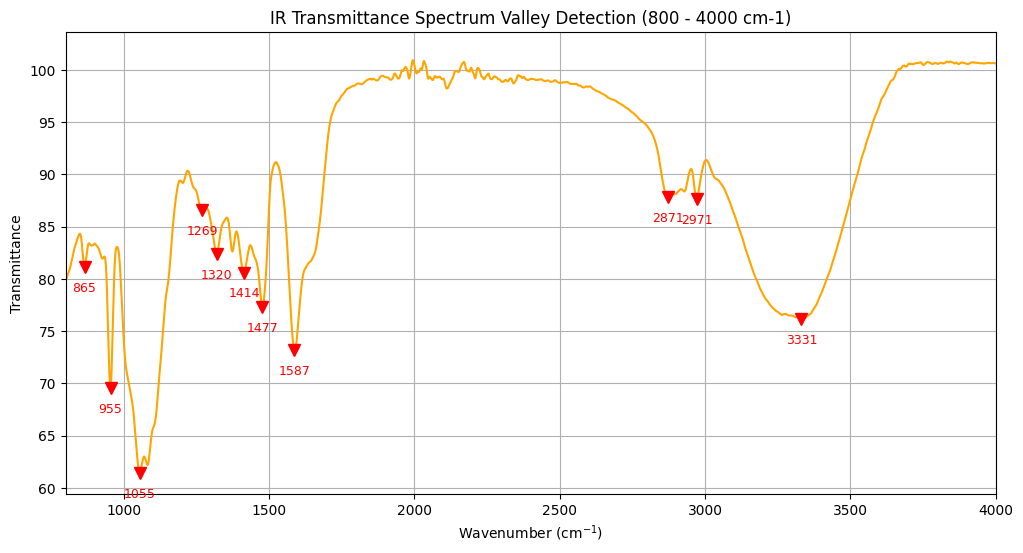


--- 3. Valley Detection Results ---
Detected Valley Position (Wavenumber), Intensity (Transmittance), Depth (Prominence), Width:
  Valley 1:
    Wavenumber: 3958.18 cm-1
    Transmittance: 100.6168
    Depth (Prominence): 0.0751
    Width (Wavenumber): 24.86 cm-1
--------------------
  Valley 2:
    Wavenumber: 3904.18 cm-1
    Transmittance: 100.5596
    Depth (Prominence): 0.1761
    Width (Wavenumber): 16.19 cm-1
--------------------
  Valley 3:
    Wavenumber: 3751.83 cm-1
    Transmittance: 100.4751
    Depth (Prominence): 0.2572
    Width (Wavenumber): 10.92 cm-1
--------------------
  Valley 4:
    Wavenumber: 3331.43 cm-1
    Transmittance: 76.1553
    Depth (Prominence): 24.6492
    Width (Wavenumber): 439.55 cm-1
--------------------
  Valley 5:
    Wavenumber: 2970.80 cm-1
    Transmittance: 87.6416
    Depth (Prominence): 3.7431
    Width (Wavenumber): 23.84 cm-1
--------------------
  Valley 6:
    Wavenumber: 2871.49 cm-1
    Transmittance: 87.8303
    Depth (Prominence)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, savgol_filter
import pandas as pd # Import pandas library for reading CSV

def ir_valley_finder(wavenumbers, intensities,
                   prominence_threshold=0.002,  # Prominence (depth) threshold for valleys
                   width_threshold=(1, 400),   # Width range for valleys
                   distance_threshold=10,      # Minimum distance between valleys
                   smooth_window_length=15,   # Savitzky-Golay smoothing window length
                   smooth_polyorder=10,        # Savitzky-Golay smoothing polynomial order
                   plot_results=True,
                   plot_range=(800, 4000),    # Plotting range parameter
                   label_prominence_threshold=0.01, # Prominence threshold for labeling valleys
                   exclude_ranges_from_label_and_marker=None): # New: Ranges to exclude from both labeling and markers
    """
    Automatically finds valleys (absorption peaks) in IR transmittance spectrum data.

    Parameters:
        wavenumbers (np.array): Wavenumber data.
        intensities (np.array): Transmittance intensity data.
        prominence_threshold (float): Prominence (depth) threshold for valleys, used to filter out
                                      insignificant valleys. Prominence is the relative depth of the
                                      valley with respect to its highest points on either side.
        width_threshold (tuple): Range (min_width, max_width) for valley width.
        distance_threshold (int): Minimum horizontal distance (in data points) between two valleys.
        smooth_window_length (int): Window length for the Savitzky-Golay filter, must be an odd number.
        smooth_polyorder (int): Polynomial order for the Savitzky-Golay filter.
        plot_results (bool): Whether to plot the valley finding results.
        plot_range (tuple): Wavenumber range for plotting (min_wavenumber, max_wavenumber).
        label_prominence_threshold (float, optional): Only valleys with prominence (depth) above this
                                                       threshold will be labeled on the plot. If None,
                                                       all detected valleys will be labeled.
        exclude_ranges_from_label_and_marker (list of tuples, optional): A list of (min_wavenumber, max_wavenumber)
                                                          tuples. Valleys within these ranges will NOT
                                                          be labeled NOR marked with 'v' on the plot.
                                                          Use (value, None) for > value, (None, value) for < value.

    Returns:
        tuple: (valley_indices, valley_properties), where valley_indices are the indices of the valleys,
               and valley_properties is a dictionary returned by find_peaks (containing 'prominences', 'widths', etc.).
    """

    print("--- 1. Data Preprocessing: Smoothing ---")
    # Ensure window length is less than the number of data points
    if smooth_window_length >= len(intensities):
        print(f"Warning: Smoothing window length ({smooth_window_length}) is greater than or equal to the number of data points ({len(intensities)}). Adjusting window length.")
        if len(intensities) % 2 == 0:
            smooth_window_length = len(intensities) - 1
        else:
            smooth_window_length = len(intensities) - 2
        if smooth_window_length < 1: # Ensure at least 1
            smooth_window_length = 1
        print(f"New smoothing window length: {smooth_window_length}")

    # Ensure polynomial order is less than window length
    if smooth_polyorder >= smooth_window_length:
        print(f"Warning: Smoothing polynomial order ({smooth_polyorder}) is greater than or equal to the window length ({smooth_window_length}). Adjusting order.")
        smooth_polyorder = smooth_window_length - 2
        if smooth_polyorder < 0:
            smooth_polyorder = 0
        print(f"New smoothing polynomial order: {smooth_polyorder}")

    smoothed_intensities = savgol_filter(intensities, window_length=smooth_window_length, polyorder=smooth_polyorder)

    print("--- 2. Valley Detection (via data inversion) ---")
    # Invert the smoothed data: valleys become peaks
    inverted_smoothed_intensities = -smoothed_intensities

    valley_indices, properties = find_peaks(inverted_smoothed_intensities,
                                            prominence=prominence_threshold, # Prominence here corresponds to the depth of the original valley
                                            width=width_threshold,
                                            distance=distance_threshold)

    print(f"Detected {len(valley_indices)} valleys (absorption peaks).")

    if plot_results:
        plt.figure(figsize=(12, 6))

        # Filter indices within the plotting range
        mask = (wavenumbers >= plot_range[0]) & (wavenumbers <= plot_range[1])
        plot_wavenumbers = wavenumbers[mask]
        plot_intensities = intensities[mask]
        plot_smoothed_intensities = smoothed_intensities[mask]

        # Prepare list for plotting valley markers and another for labeling
        plot_valley_marker_indices = [] # Valleys that will have a 'v' marker
        plot_valley_label_indices = []  # Valleys that will have a text label (subset of marker_indices)

        for i, original_idx in enumerate(valley_indices):
            wvn = wavenumbers[original_idx]
            # Check if current valley's wavenumber is within an excluded range for markers/labels
            should_exclude_from_plot_and_label = False
            if exclude_ranges_from_label_and_marker:
                for r_min, r_max in exclude_ranges_from_label_and_marker:
                    if r_min is not None and r_max is not None and r_min <= wvn <= r_max:
                        should_exclude_from_plot_and_label = True
                        break
                    elif r_min is not None and r_max is None and wvn >= r_min: # Handles > value
                        should_exclude_from_plot_and_label = True
                        break
                    elif r_min is None and r_max is not None and wvn <= r_max: # Handles < value
                        should_exclude_from_plot_and_label = True
                        break

            # If within plot range AND NOT excluded for plotting
            if (plot_range[0] <= wvn <= plot_range[1]) and not should_exclude_from_plot_and_label:
                # Find the new index of this valley in the masked wavenumbers array
                new_idx_array = np.where(plot_wavenumbers == wvn)[0]
                if new_idx_array.size > 0:
                    plot_valley_marker_indices.append(new_idx_array[0])

                    # Also check if this valley should be labeled (prominence threshold)
                    valley_depth_prominence = properties['prominences'][i]
                    if (label_prominence_threshold is None or valley_depth_prominence >= label_prominence_threshold):
                        plot_valley_label_indices.append(i) # Store original index for properties lookup

        plt.plot(plot_wavenumbers, plot_intensities, label='Original Spectrum', alpha=0.0) # Reduce opacity of original spectrum to highlight smoothed
        plt.plot(plot_wavenumbers, plot_smoothed_intensities, label=f'Smoothed Spectrum (Window={smooth_window_length}, Order={smooth_polyorder})', color='orange')
        # Plot only the valleys that should have markers
        plt.plot(plot_wavenumbers[plot_valley_marker_indices], plot_smoothed_intensities[plot_valley_marker_indices], "v", color='red', markersize=8, label='Detected Valleys') # Use 'v' marker for valleys

        # Label wavenumbers on valleys, only for valleys that pass all criteria (including exclusion)
        for i_orig_idx in plot_valley_label_indices: # Iterate through indices that passed label criteria
            original_idx = valley_indices[i_orig_idx]
            wvn = wavenumbers[original_idx]
            # Use a larger negative offset for labels to be further away
            plt.text(wvn,
                     smoothed_intensities[original_idx] - 1.4, # Increased offset from -0.02 to -0.04
                     f'{wvn:.0f}', # Display integer wavenumber only
                     ha='center', va='top', fontsize=9, color='red') # va='top' places text above the marker


        plt.title(f'IR Transmittance Spectrum Valley Detection ({plot_range[0]} - {plot_range[1]} cm-1)')
        plt.xlabel('Wavenumber (cm$^{-1}$)')
        plt.ylabel('Transmittance')
        #plt.legend()
        plt.grid(True)
        plt.xlim(plot_range[0], plot_range[1]) # Force X-axis range
        plt.show()

    print("\n--- 3. Valley Detection Results ---")
    if len(valley_indices) > 0:
        print("Detected Valley Position (Wavenumber), Intensity (Transmittance), Depth (Prominence), Width:")
        for i, idx in enumerate(valley_indices):
            # Also filter printout if desired (currently prints all detected)
            # You could add 'should_exclude_from_plot_and_label' logic here too if you don't want to print them
            print(f"  Valley {i+1}:")
            print(f"    Wavenumber: {wavenumbers[idx]:.2f} cm-1")
            print(f"    Transmittance: {smoothed_intensities[idx]:.4f}")
            print(f"    Depth (Prominence): {properties['prominences'][i]:.4f}")
            if len(wavenumbers) > 1:
                wavenumber_step = np.abs(wavenumbers[1] - wavenumbers[0])
                print(f"    Width (Wavenumber): {properties['widths'][i] * wavenumber_step:.2f} cm-1")
            print("-" * 20)
    else:
        print("No valleys detected. Try adjusting the valley finding parameters.")

    return valley_indices, properties

# --- Example Usage ---
if __name__ == "__main__":
    csv_file_path = './CMCSP-045CC.csv' # Replace with your CSV file path

    try:
        df = pd.read_csv(csv_file_path, header=None)
        wavenumbers_raw = df.iloc[:, 0].values
        intensities_raw = df.iloc[:, 1].values
        print(f"Successfully read file: {csv_file_path}")
        print(f"Number of data points: {len(wavenumbers_raw)}")
        print(f"Wavenumber range: {wavenumbers_raw.min():.2f} - {wavenumbers_raw.max():.2f} cm-1")

        if wavenumbers_raw[0] < wavenumbers_raw[-1]:
            wavenumbers = np.flip(wavenumbers_raw)
            intensities = np.flip(intensities_raw)
            print("Wavenumbers have been reordered to descending.")
        else:
            wavenumbers = wavenumbers_raw
            intensities = intensities_raw
            print("Wavenumbers are already in descending order.")

        if not isinstance(wavenumbers, np.ndarray) or wavenumbers.size == 0 or \
           not isinstance(intensities, np.ndarray) or intensities.size == 0:
            raise ValueError("Read wavenumber or intensity data is empty or in incorrect format.")

        print(f"\n--- Data Verification ---")
        print(f"Wavenumber array shape: {wavenumbers.shape}, dtype: {wavenumbers.dtype}")
        print(f"Intensity array shape: {intensities.shape}, dtype: {intensities.dtype}")
        print(f"First 5 wavenumbers: {wavenumbers[:5]}")
        print(f"First 5 intensities: {intensities[:5]}")
        print(f"--- End Data Verification ---\n")

    except FileNotFoundError:
        print(f"Error: File '{csv_file_path}' not found. Please check the file path.")
        exit()
    except Exception as e:
        print(f"An error occurred while reading the CSV file: {e}")
        print("Please check the CSV file format, ensure the first column is wavenumber, the second is intensity, and the file content is valid.")
        exit()

    # Define the ranges to exclude from both markers and labels
    # (min_wavenumber, max_wavenumber) for a closed interval
    # (value, None) for > value (e.g., (3600, None) means > 3600)
    # (None, value) for < value (e.g., (None, 800) means < 800)
    exclusion_ranges = [
        (1700, 2600), # Exclude 1800 to 2600 cm-1
        (3600, None)  # Exclude >= 3600 cm-1
    ]

    # Call the automatic valley finding function
    valley_indices, valley_properties = ir_valley_finder(
        wavenumbers,
        intensities,
        prominence_threshold=0.04,    # Minimum depth for valley detection
        width_threshold=(10, 1000),     # Valley width range (in data points)
        distance_threshold=50,        # Avoid detecting too closely spaced valleys
        smooth_window_length=24,      # Smoothing window
        smooth_polyorder=3,           # Smoothing polynomial order
        plot_range=(800, 4000),       # Plot only the 800-3000 cm-1 range
        label_prominence_threshold=0.09, # Only label valleys with depth >= 0.05
        exclude_ranges_from_label_and_marker=exclusion_ranges # Pass the exclusion ranges
    )

    # 3. Print additional valley properties (optional)
    print("\n--- More Valley Properties ---")
    if valley_indices.size > 0:
        for i, idx in enumerate(valley_indices):
            print(f"Valley {i+1} (Wavenumber: {wavenumbers[idx]:.2f} cm-1):")
            print(f"  Valley left/right baseline indices (original spectrum): {valley_properties['left_bases'][i]}, {valley_properties['right_bases'][i]}")
            print(f"  Half-width (data points): {valley_properties['widths'][i]:.2f}")
            if len(wavenumbers) > 1:
                wavenumber_step = np.abs(wavenumbers[1] - wavenumbers[0])
                print(f"  Half-width (Wavenumber): {valley_properties['widths'][i] * wavenumber_step:.2f} cm-1")
            #print(f"  Transmittance at valley bottom: {smoothed_intensities[idx]:.4f}")
            print("-" * 20)
    else:
        print("No valleys detected.")